In [ ]:
'''
Script to implement basic functionalities of RL2
- learn a policy via policy gradient
- adaptable policy via lstm/ gru network
- validation of learned policy
'''

In [2]:
# load environment
# main function
# - defining hyper-parameter
# - calling train
# - calling evaluate
# - data handling
# network class
# - network architecture
# - update policy function
# - train function (policy SGD)
# evaluate function

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/roman/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [18]:
class environment():
    # simple sine environment
    # initialize
    def __init__(self):
        self.amplitude = 1
        self.state = np.random.rand()
    
    # sample amplitude
    def sample_env(self):
        self.amplitude = 0.1+ np.random.rand()
        
    # function
    def _observation(self):
        return self.amplitude* np.sin(2* np.pi* self.state)
    
    # step
    def step(self, action=0):
        self.state = np.random.rand()
        observation = self._observation()
        return self.state, observation

0.478992237011


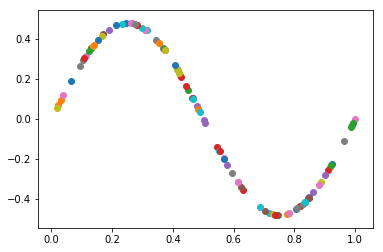

0.582384853658


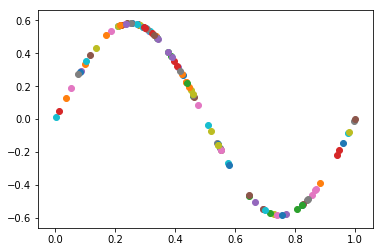

0.692229506297


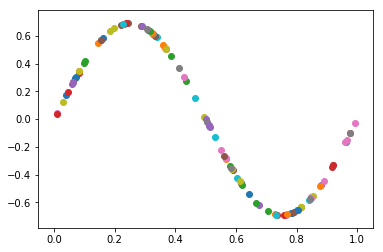

In [19]:
env = environment()
for i in range(3):
    env.sample_env()
    print(env.amplitude)
    
    plt.figure()
    for j in range(100):
        obs = env.step()
        plt.scatter(obs[0], obs[1])
        
    plt.show()

In [52]:
class policy():
    # initialize parameters
    def __init__(self):
        self.hidden_dim = 64
        self.state_dim = 1
        self.action_dim = 1
        self.vf_coeff = 0.05
        self.ent_coef = 0.01 # weighting for entropy in loss
        self.learning_rate = 1e-4
        
        self.model()
    
    # initialize network architecture
    def model(self):
        with tf.variable_scope('network', reuse=tf.AUTO_REUSE):
            # current inputs
            self.state = tf.placeholder(tf.float32, [None, self.state_dim])
            self.action = tf.placeholder(tf.float32, [None])
            self.reward = tf.placeholder(tf.float32, [None])
            self.advantage = tf.placeholder(tf.float32, [None])
            
            self.input = self.state
            
            # future inputs (for loss)
            self.state_next = tf.placeholder(tf.float32, [None, self.state_dim])
            self.action_next = tf.placeholder(tf.float32, [None])
            self.reward_next = tf.placeholder(tf.float32, [None])
            
        
            # lstm cell
            lstm = tf.contrib.rnn.LSTMCell(self.hidden_dim, state_is_tuple=True, activation=tf.nn.relu)
            
            # hidden state of lstm
            self.prev_c = self.L0_asym = tf.get_variable('prev_c', dtype=tf.float32,
                                               initializer=tf.zeros((1, self.hidden_dim)))
            self.prev_h = self.L0_asym = tf.get_variable('prev_h', dtype=tf.float32,
                                               initializer=tf.zeros((1, self.hidden_dim)))

            # network
            self.lstm_out, self.lstm_state = tf.nn.dynamic_rnn(lstm,
                                                     inputs=tf.expand_dims(self.input, [0]),
                                                     initial_state= tf.contrib.rnn.LSTMStateTuple(self.prev_c, self.prev_h),
                                                     sequence_length=tf.shape(self.input)[:1],
                                                     time_major=False)
            
            # outputs (discrete)
            self.pi = tf.contrib.layers.fully_connected(self.lstm_out,
                                                        num_outputs=self.action_dim,
                                                        activation_fn=None)
            self.va = tf.contrib.layers.fully_connected(self.lstm_out,
                                                        num_outputs=self.action_dim,
                                                        activation_fn=None)
            
            self.variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='network')

            
            
        with tf.variable_scope('loss', reuse=tf.AUTO_REUSE):
            
            # policy loss
            negative_log_policy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.pi, labels=self.action)
            self.policy_loss = tf.reduce_sum(tf.multiply(self.advantage, negative_log_policy))
            
            # value loss
            self.value_loss = tf.reduce_sum(tf.square(tf.squeeze(self.va)- self.reward)/2.)
            
            # entropy loss
            action_value = self.pi- tf.reduce_max(self.pi, axis=1, keepdims=True)
            exp_action_value = tf.exp(action_value)
            Z = tf.reduce_sum(exp_action_value, axis=1, keepdims=True)
            prob = exp_action_value/ Z
            self.entropy_loss = tf.reduce_sum(tf.reduce_sum(prob* (tf.log(Z)- exp_action_value), axis=1)) # XXX
            
            # loss
            self.loss = self.policy_loss- self.ent_coeff* self.entropy_loss+ self.vf_coeff* self.value_loss
            
            # optimizer
            self.optimizer = tf.train.RMSPropOptimizer(learning_rate=self.learning_rate, decay=0.99, epsilon=1e-5)
            self.train = self.optimizer.minimize(self.loss, var_list=self.variables)
            
            # summary
            
        # reset hidden states
        self.reset = self._reset()


    # reset hidden state
    def _reset(self):
        reset_hidden_c = tf.assign(self.prev_c, tf.zeros((1, self.hidden_dim)))
        reset_hidden_h = tf.assign(self.prev_h, tf.zeros((1, self.hidden_dim)))
        return tf.group([reset_hidden_c, reset_hidden_h])
        
    
    # update hidden state
    
    # (get action?)
    
    # evaluate (freeze network i.e. hidden state)

In [53]:
network = policy()
with tf.Session() as sess:
    # session
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #
    x = np.array([[1.], [2.], [3.]])
    pout, out, state = sess.run([network.pi, network.lstm_out, network.lstm_state], feed_dict={network.input: x})
    
    print(pout)
    print(state)
    print(out)

ValueError: Rank mismatch: Rank of labels (received 1) should equal rank of logits minus 1 (received 3).

In [ ]:
def main():
    # hyperparameter
    
    # instantiate directories, environment, policy
    
    # training loop
    
        # interact with env
    
        # update policy
        
    # train policy
    
    # evaluate policy